In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("players.csv")

In [3]:
hero_id = 7  # earthshaker hero id = 7

In [4]:
df['team'] = df['team'].replace({'Radiant': 1, 'Dire': 0})

In [5]:
X = df[df['hero_id'] == hero_id]

In [6]:
X.count()

match_id       389
hero_id        389
player_slot    389
team           389
gold           389
gold_spent     389
gold_total     389
xpm            389
lane           389
dtype: int64

In [7]:
scale = StandardScaler()
scaled_df = scale.fit_transform(X)

In [8]:
n_clusters = 5

In [9]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [10]:
kmeans.fit(scaled_df)

KMeans(n_clusters=5, random_state=42)

In [11]:
target_hero_roles = kmeans.predict(scaled_df)

In [12]:
print(target_hero_roles)

[4 3 2 2 2 2 2 4 4 4 2 3 2 3 4 3 3 4 2 1 0 2 3 2 2 3 4 3 2 4 3 2 2 3 4 3 2
 2 4 3 2 2 2 4 2 4 3 4 1 3 3 3 3 3 2 3 4 4 2 2 3 1 2 2 3 2 4 3 2 3 3 4 4 3
 3 2 4 4 2 3 1 3 2 4 3 3 2 3 2 3 4 2 2 3 2 2 1 3 3 1 3 2 2 0 3 3 3 3 3 1 4
 4 2 4 4 4 1 2 4 3 2 1 3 4 2 2 2 4 4 3 3 2 2 3 4 2 0 3 3 3 4 3 3 2 4 2 1 3
 3 4 4 3 2 1 3 3 3 1 3 3 3 3 3 2 2 2 2 2 1 1 2 3 2 3 3 2 4 1 2 2 1 0 1 2 1
 4 4 1 3 2 1 1 3 2 0 3 4 4 2 2 1 3 4 2 4 4 3 2 3 3 3 2 3 2 3 1 0 3 2 3 2 2
 2 1 2 4 3 3 3 1 2 2 2 3 2 2 2 1 2 4 2 2 1 1 3 3 2 3 3 3 3 3 3 1 1 3 3 1 1
 3 1 4 2 4 2 2 3 3 1 3 2 3 2 2 1 2 2 3 2 2 3 2 1 3 4 2 3 3 2 2 2 2 2 4 0 4
 2 3 3 1 0 4 2 1 3 2 2 2 1 1 3 2 4 1 2 3 1 2 2 3 2 2 3 2 3 2 3 1 1 2 2 3 2
 3 3 2 3 3 2 3 2 3 3 1 3 3 3 3 2 2 2 1 2 2 3 3 2 3 2 3 3 2 1 2 2 2 2 4 1 3
 3 3 3 3 2 2 3 2 2 3 2 1 3 2 0 3 2 2 3]


In [13]:
type(target_hero_roles)

numpy.ndarray

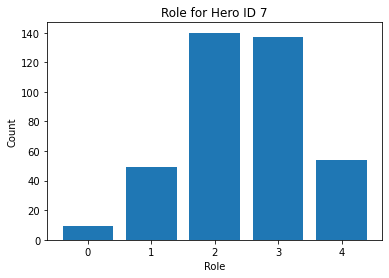

In [14]:
role_counts = np.bincount(target_hero_roles)

plt.bar(range(len(role_counts)), role_counts)

plt.xlabel('Role')
plt.ylabel('Count')
plt.title(f'Role for Hero ID {hero_id}')

plt.show()

Features reduction

In [15]:
hero_df = df[df['hero_id'] == hero_id]

In [16]:
X_FR = hero_df[['gold', 'gold_spent', 'gold_total', 'xpm']]

In [19]:
scaled_fr_df = scale.fit_transform(X_FR)

In [21]:
kmeans_fr = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_fr.fit(scaled_fr_df)

KMeans(n_clusters=5, random_state=42)

In [22]:
target_hero_roles_fr = kmeans_fr.predict(scaled_fr_df)

In [24]:
print(target_hero_roles_fr)

[3 2 4 4 4 4 2 4 3 3 2 2 4 4 1 2 4 3 2 3 0 2 4 4 2 4 3 4 2 3 4 4 2 4 3 4 2
 2 3 4 2 4 4 1 4 3 4 3 3 4 4 2 2 2 4 4 3 3 4 4 4 3 2 2 2 4 3 2 2 4 4 3 4 2
 2 4 1 1 4 4 1 2 2 3 2 2 2 2 4 2 3 4 2 4 4 4 3 2 2 3 4 4 4 0 3 4 2 2 3 3 3
 3 2 4 1 3 3 4 3 2 4 3 4 3 4 2 4 1 3 4 2 2 4 2 3 4 0 4 2 2 1 4 2 2 3 4 1 4
 2 3 3 4 2 3 2 4 4 1 4 2 2 4 4 4 2 2 4 4 1 3 2 4 2 2 4 4 1 3 2 4 1 0 3 2 1
 4 3 3 3 2 3 3 4 2 0 4 3 3 2 2 3 4 1 2 1 1 4 4 4 2 4 4 4 2 2 3 0 2 2 2 4 2
 4 3 4 3 2 4 2 3 4 4 4 2 4 4 4 3 4 1 2 4 3 3 4 2 4 2 2 4 2 4 4 3 1 2 2 1 1
 2 1 3 4 1 2 4 4 2 3 2 4 2 2 2 3 4 2 4 4 4 4 4 3 4 3 2 2 2 2 2 4 2 4 3 0 3
 4 4 4 3 0 1 4 3 4 2 4 4 3 3 4 2 1 3 2 2 4 4 4 4 4 2 4 2 2 4 4 3 1 2 2 4 4
 4 2 2 2 4 3 4 4 2 2 1 2 4 2 4 2 2 4 3 4 2 2 2 2 2 4 4 2 2 3 2 2 4 2 3 3 4
 4 2 4 2 4 2 4 2 2 2 4 3 2 2 0 4 4 4 4]


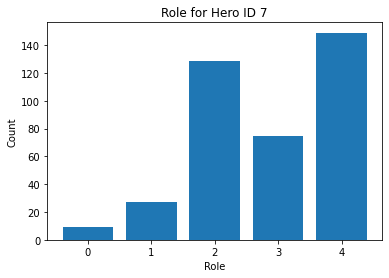

In [25]:
role_counts_fr = np.bincount(target_hero_roles_fr)

plt.bar(range(len(role_counts_fr)), role_counts_fr)

plt.xlabel('Role')
plt.ylabel('Count')
plt.title(f'Role for Hero ID {hero_id}')

plt.show()